#### Author: Mustafa Radheyyan
#### Date: 04/03/2023
#### Assignment: Cognixia JUMPlus Python Project 1
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

#### Imports and Constants

If CurrencyConverter is not installed, then uncomment below and install it

In [ ]:
# %pip install CurrencyConverter

In [ ]:
import pandas as pd

In [ ]:
FIFA_PLAYERS_CSV_PATH = 'players_20.csv'

In [ ]:
TOP_FIVE = 5
TOP_TEN = 10

Helper functions for displaying Pandas DataFrame and Series objects within a context manager

In [ ]:
def force_show_all_columns(df):
    with pd.option_context('display.max_columns', None, 'display.width', None):
        display(df)

In [ ]:
def force_show_all_rows(df):
    with pd.option_context('display.max_rows', None, 'display.width', None):
        display(df)

In [ ]:
def force_show_max_width(df):
    with pd.option_context('display.max_colwidth', None, 'display.width', None):
        display(df)

In [ ]:
def compact_style(df):
    df = (
        df.style.set_table_styles([
            {"selector": "tr", "props": "line-height: 12px;"},
            {"selector": "td,th", "props": "line-height: inherit; padding: 1;"}
]))
    return df

## 1. Load the csv file and show <span style="color:#FF6000;font-style:oblique;">top 5 records</span> from it.

Before setting the index column to be "sofifa_id", I verified that the values of the column were completely unique.

In [ ]:
fifa_players_df = pd.read_csv(FIFA_PLAYERS_CSV_PATH)
print(f"The number of unique IDs is: {len(fifa_players_df.sofifa_id.unique())}, compared to the number of rows total: {len(fifa_players_df)}")
fifa_players_df = pd.read_csv(FIFA_PLAYERS_CSV_PATH, index_col='sofifa_id')
fifa_players_df.head()

## <span style="color:gold;font-style:italic;">Data Cleaning</span>

#### Examining the data types of the DataFrame's columns

In [ ]:
print(list(fifa_players_df.columns))

In [ ]:
def show_df_dtypes(df):
    dtypes_df = df.dtypes
    dtypes_df = (
        dtypes_df
        .astype("str")
        .to_frame(name="dtype")
    )
    dtypes_df.index.names = ["column"]
    
    dtypes_df = (
        dtypes_df
        .sort_values('dtype', key=lambda col: col.str.lower())
    )
    dtypes_df = compact_style(dtypes_df)
    
    force_show_all_rows(dtypes_df)

In [ ]:
show_df_dtypes(fifa_players_df)

#### Data Cleaning Functions

Initializing the currency converter with daily Euro FX values

In [ ]:
from currency_converter import CurrencyConverter, SINGLE_DAY_ECB_URL

# Load the packaged data (might not be up to date)
c = CurrencyConverter()

# Dowload only the latest available day. Current value is:
# https://www.ecb.europa.eu/stats/eurofxref/eurofxref.zip
c = CurrencyConverter(SINGLE_DAY_ECB_URL)

Helper function to convert currency using passed in arguments

In [ ]:
def convert_currency(value, from_cur, to_cur):
    return c.convert(value, from_cur, to_cur)

Testing out the currency function separately

In [ ]:
convert_currency(10, 'EUR', 'USD')

Extract individual unique values from object (string) column formatted as such: "abc, def, ghi"

In [ ]:
def extract_csv_column(df: pd.DataFrame):
    df = (
        df.str.split()
          .explode()
          .str.replace(',', "")
          .drop_duplicates()
          )
    return df

Retrieve all of the unique soccer player positions from the DataFrame

In [ ]:
player_positions_column = extract_csv_column(fifa_players_df['player_positions']) 
combination_position_column = pd.concat([fifa_players_df['nation_position'], fifa_players_df['team_position'], player_positions_column])
print(list((
    combination_position_column
    .dropna()
    .drop_duplicates()
    .sort_values()
    )))

In [ ]:
print([column for column in sorted(list(fifa_players_df.columns)) if len(column) <= 3 and (column != "age" and column != "dob")])

In [ ]:
position_names_from_columns = ['cam', 'cb', 'cdm', 'cf', 'cm', 'lam', 'lb', 'lcb', 'lcm', 'ldm', 'lf', 'lm', 'ls', 'lw', 'lwb', 'ram', 'rb', 'rcb', 'rcm', 'rdm', 'rf', 'rm', 'rs', 'rw', 'rwb', 'st']
position_names_from_rows = ['CAM', 'CB', 'CDM', 'CF', 'CM', 'GK', 'LAM', 'LB', 'LCB', 'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB', 'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RES', 'RF', 'RM', 'RS', 'RW', 'RWB', 'ST', 'SUB']

In [ ]:
column_position_uppercase = [position.upper() for position in position_names_from_columns]
column_position_uppercase.extend(position_names_from_rows)
unique_position_names = set(column_position_uppercase)
print(sorted(unique_position_names))

Dictionary for replacing abbreviated position names with full words

In [ ]:
soccer_position_abbreviation_dict = {
    'CAM': "Center Attacking Midfielder", 'CB': "Center Back", 'CDM': "Center Defending Midfielder", 'CF': "Center Forward",
    'CM': "Center Midfielder", 'GK': "Goalkeeper", 'LAM': "Left Attacking Midfielder", 'LB': "Left Back",
    'LCB': "Left Center Back", 'LCM': "Left Center Midfielder", 'LDM': "Left Defensive Midfielder", 'LF': "Left Forward", 'LM': "Left Midfielder",
    'LS': "Left Striker", 'LW': "Left Wing", 'LWB': "Left Wing Back", 'RAM': "Right Attacking Midfielder", 
    'RB': "Right Back", 'RCB': "Right Center Back", 'RCM': "Right Center Midfielder", 'RDM': "Right Defensive Midfielder",
    'RES': "Reserve", 'RF': "Right Forward", 'RM': "Right Midfielder", 'RS': "Right Striker", 'RW': "Right Wing",
    'RWB': "Right Wing Back", 'ST': "Striker", 'SUB': "Substitute"
}

Make soccer position abbreviation key lowercase and value snake case

In [ ]:
column_abbreviation_dict = {key.lower(): soccer_position_abbreviation_dict[key].replace(" ", "_").lower() for key in soccer_position_abbreviation_dict}

In [ ]:
real_face_replacement_dict = {
    "Yes": True,
    "No": False
}

Dictionary for replacing data types of DataFrame columns

Ex reasoning: Change type of column "contract_valid_until" from float64 to Int64, requiring a capital I in "Int" in order to accept NaN values

In [ ]:
dtype_conversions = {'contract_valid_until': 'Int64',
                     'nation_jersey_number': 'Int64',
                     'nation_position': 'category',
                     'team_position': "category",
                     'player_positions': "category",
                     "club": 'category',
                     "nationality": 'category',
                     "loaned_from": 'category',
                     "preferred_foot": 'category',
                     "body_type": 'category',
                     "work_rate": 'category'}

Dictionary for replacing columns "team_position" and "nation_position" abbreviated values with full words, as well as "real_face" boolean replacement

In [ ]:
value_conversions = {
    'team_position': soccer_position_abbreviation_dict,
    'nation_position': soccer_position_abbreviation_dict,
    'real_face': real_face_replacement_dict
}

Line 2: Replace abbreviated column names with full words<br/><br/>
Line 3: Change data types of columns with type conversions<br/><br/>
Line 4: Replace column values with value conversions<br/><br/>
Lines 6-8: Add "salary_eur" column to DataFrame
* Line 6: Only proceed with adding "salary_eur" column if it is not already a column, and if "wage_eur" is a valid column.
* Line 7: Create a "salary_eur" column in the DataFrame by multiplying the "wage_eur" column by 52.
* Line 8: Move "salary_eur" column to index of "wage_eur" column. DataFrame.insert(loc, column, value) where df.pop will return the removed column.<br/>

Lines 10-12: Convert columns to date type
* Line 10: Specify columns to be converted to date type
* Lines 11-12: Change type of DataFrame columns to datetime

In [ ]:
def data_cleaning(df):
    df = df.rename(columns=column_abbreviation_dict)
    df = df.astype(dtype_conversions)
    df = df.replace(value_conversions)
    
    if 'salary_eur' not in df.columns and 'wage_eur' in df.columns:
        df['salary_eur'] = df['wage_eur'].multiply(52)
        df.insert(list(df.columns).index("wage_eur"), 'salary_eur', df.pop('salary_eur'))
    
    date_columns = ['dob', 'joined']
    for column in date_columns:
        df[column] = pd.to_datetime(df[column])
    return df

Line 2: Get columns of type datetime64<br/><br/>
Lines 3-4: Change column date format to MM/DD/YYYY (American Standard). This will convert the column to an object type (string) instead of datetime

In [ ]:
def americanize_dates(df):
    date_columns = list(df.select_dtypes('datetime64[ns]').columns)
    for column in date_columns:
        df[column] = df[column].dt.strftime('%m/%d/%Y')
    return df

Line 2: Get list of columns which end in "_cm" or "_kg"<br/><br/>
Line 3: Create column replacement dictionary, replacing "_cm" with "_in" and "_kg" with "_lb"<br/><br/>
Lines 5-21: Loop through columns from Line 2 and create new columns as well as convert columns
* Lines 6-18: For "_cm" columns, convert cm to inches and create column to display the "_cm" column in feet (feet and inches)
    * Line 7: Convert column to inches
    * Line 9: Get name of column before "_cm" ending
    * Line 10: Create the new column name for the column to display in feet
    * Line 13: Get a series object of feet by dividing the column with "_cm" column (now converted to inch values) by 12
    * Line 14: Get a series object of inches by modding the column with "_cm" column (now converted to inch values) by 12
    * Line 16: Construct a string feet column (in feet and inches) by adding the series objects from Lines 12-13
    * Line 26: Insert feet column from Line 15 into DataFrame, at the index of the "_cm" column
* Lines 28-29: Convert "_kg" column to pounds (lb)
    * Line 29: Convert column to pounds

Line 31: Rename all columns which ended in "_cm" or "_kg"

In [ ]:
def americanize_units(df):
    unit_columns = [column for column in list(df.columns) if column.endswith('_cm') or column.endswith('_kg')]
    american_unit_columns = {column: column.replace('_cm', '_in') if column.endswith("_cm") else column.replace('_kg', '_lb') for column in unit_columns}
    
    for column in unit_columns:
        if column.endswith("_cm"):
            df[column] = round(df[column].multiply(0.393701), 2)
            
            column_identifier = column[:column.rfind('_cm')]
            new_column_name = f'{column_identifier}_feet'
            
            if new_column_name not in list(df.columns):
                feet_series = (df[column].divide(12))
                inches_series = (df[column].mod(12))
                
                feet_column = (
                    feet_series
                    .astype(int)
                    .astype(str)
                    + ' ft ' 
                    + round(inches_series, 1)
                    .astype(str) 
                    + ' in'
                )
                
                df.insert(list(df.columns).index(column), new_column_name, feet_column)
            
        elif column.endswith("_kg"):
            df[column] = round(df[column].multiply(2.20462262185), 2)
            
    df = df.rename(columns=american_unit_columns)
    return df

Line 2: Get list of columns which end in "_eur"<br/><br/>
Line 3: Create column replacement dictionary, replacing "_eur" with "_usd"<br/><br/>
Lines 5-6: Loop through columns from Line 2 ("_eur" columns) and convert columns from EUR to USD
* Line 6: Convert column to USD by applying the convert currency function

Line 7: Rename all columns which ended in "_eur"

In [ ]:
def dollarize(df):
    unit_columns = [column for column in list(df.columns) if column.endswith('_eur')]
    usd_columns = {column: column.replace('_eur', '_usd') for column in unit_columns}
    
    for column in unit_columns:
        df[column] = df[column].apply(convert_currency, args=('EUR', 'USD'))
    df = df.rename(columns=usd_columns)
    return df

Line 2: Get DataFrame of replacement weight and height units<br/><br/>
Line 3: Get DataFrame of replaced date values<br/><br/>
Line 4: Get DataFrame of replaced currency values

In [ ]:
def americanize(df):
    americanized_df = americanize_units(df)
    americanized_df = americanize_dates(americanized_df)
    americanized_df = dollarize(americanized_df)
    return americanized_df

Perform data cleaning operations

In [ ]:
fifa_players_df = data_cleaning(fifa_players_df)
force_show_all_columns(fifa_players_df.head())

Perform "Americanization" of DataFrame columns' units and standards

In [ ]:
fifa_players_df = americanize(fifa_players_df)
force_show_all_columns(fifa_players_df.head())

Saving output to CSV for simple Tableau support

In [ ]:
fifa_players_df.to_csv('fifa_players.csv')

Saving output to Parquet for storage and speed optimization

In [ ]:
fifa_players_df.to_parquet('fifa_players.parquet')

## 2. How you would be able to see each <span style="color:#FF6000;font-style:oblique;">column's name</span>?

In [ ]:
fifa_player_column_list = list(fifa_players_df.reset_index().columns)

In [ ]:
print(fifa_player_column_list)

In [ ]:
force_show_all_columns(fifa_players_df.head())

## 3. Show the <span style="color:#FF6000;font-style:oblique;">number of rows and columns</span> in the dataset. 

In [ ]:
fifa_players_df.reset_index().info()

In [ ]:
fifa_players_df.reset_index().shape

### Rows

In [ ]:
len(fifa_players_df)

### Columns

In [ ]:
len(fifa_players_df.reset_index().columns)

## 4. Show the <span style="color:#FF6000;font-style:oblique;">number of players in each country</span>.

In [ ]:
columns_with_country_string = [column for column in fifa_player_column_list if "nation" in column]
print(columns_with_country_string)
country_column = columns_with_country_string[columns_with_country_string.index("nationality")]

In [ ]:
fifa_players_countries = (
    fifa_players_df
    .groupby(country_column)
    .size()
    .to_frame(name='player count')
)
print(f"There are {len(fifa_players_countries)} countries and {fifa_players_countries['player count'].sum()} players total.")
force_show_all_rows(compact_style(fifa_players_countries))

## 5. Show the <span style="color:#FF6000;font-style:oblique;">top 10 countries with the highest amount of players</span>.

In [ ]:
top_10_player_count_countries = (
    fifa_players_countries
    .nlargest(TOP_TEN, 'player count')
    .reset_index()
    .rename_axis('rank')
)
top_10_player_count_countries.index += 1
top_10_player_count_countries

## 6. Create a <span style="color:#FF6000;font-style:oblique;">bar plot</span> of the top 5 countries with the highest number of players, and fill the bars in green

In [ ]:
top_5_player_count_countries = top_10_player_count_countries.head()

chart_title = f'Top {TOP_FIVE} Countries by Number of FIFA Soccer Players'
chart_x_label = 'Country'
chart_y_label = 'Number of Players'

ax = top_5_player_count_countries.set_index(country_column).plot.bar(color='green', rot=45, width=0.7, legend=None, title=chart_title, xlabel=chart_x_label, ylabel=chart_y_label)

## 7. Display the short name and wages for the top 5 players.

In [ ]:
columns_with_name_string = [column for column in fifa_player_column_list if "name" in column]
print(columns_with_name_string)
short_name_column = columns_with_name_string[columns_with_name_string.index('short_name')]

In [ ]:
columns_with_wage_string = [column for column in fifa_player_column_list if "wage" in column]
print(columns_with_wage_string)
wage_column = columns_with_wage_string[columns_with_wage_string.index('wage_usd')]

In [ ]:
fifa_players_df.head()[[short_name_column, wage_column]]

## 8. Display the short name and wages for the top 5 players with the highest salaries.

In [ ]:
columns_with_salary_string = [column for column in fifa_player_column_list if "salary" in column]
print(columns_with_salary_string)
salary_column = columns_with_salary_string[columns_with_salary_string.index('salary_usd')]

In [ ]:
top_5_salaries_players = fifa_players_df[[short_name_column, salary_column]].nlargest(TOP_FIVE, salary_column)
top_5_salaries_players

## 9. Create a bar plot of the previous bullet point.

In [ ]:
from matplotlib.ticker import FuncFormatter

def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)

formatter = FuncFormatter(millions)

In [ ]:
chart_title = f'Top {TOP_FIVE} Highest Paid FIFA Soccer Players'
chart_x_label = 'Name'
chart_y_label = f"Salary ({salary_column[salary_column.rfind('_') + 1:].upper()})"

ax = top_5_salaries_players.set_index(short_name_column).plot.bar(color='green', rot=45, width=0.6, legend=None, title=chart_title, xlabel=chart_x_label, ylabel=chart_y_label)

ax.yaxis.set_major_formatter(formatter)

## 10. Show top 10 records of Germany.

In [ ]:
german_fifa_players = fifa_players_df.loc[fifa_players_df[country_column] == 'Germany']
first_ten_german_fifa_players = german_fifa_players.head(TOP_TEN)
force_show_all_columns(first_ten_german_fifa_players)

## 11. Show the top 5 records of Germany players who have a maximum height, weight and wage

### Maximum height

In [ ]:
columns_with_height_string = [column for column in fifa_player_column_list if "height" in column]
print(columns_with_height_string)
height_column = columns_with_height_string[columns_with_height_string.index('height_in')]

In [ ]:
top_height_german_fifa_players = german_fifa_players.nlargest(TOP_FIVE, height_column)
top_height_german_fifa_players.insert(0, height_column, top_height_german_fifa_players.pop(height_column))
force_show_all_columns(top_height_german_fifa_players)

### Maximum weight

In [ ]:
columns_with_weight_string = [column for column in fifa_player_column_list if "weight" in column]
print(columns_with_weight_string)
weight_column = columns_with_weight_string[columns_with_weight_string.index('weight_lb')]

In [ ]:
top_weight_german_fifa_players = german_fifa_players.nlargest(TOP_FIVE, weight_column)
top_weight_german_fifa_players.insert(0, weight_column, top_weight_german_fifa_players.pop(weight_column))
force_show_all_columns(top_weight_german_fifa_players)

### Maximum wages

In [ ]:
top_wage_german_fifa_players = german_fifa_players.nlargest(TOP_FIVE, wage_column)
top_wage_german_fifa_players.insert(0, wage_column, top_wage_german_fifa_players.pop(wage_column))
force_show_all_columns(top_wage_german_fifa_players)

## 12. Display the short name and wages of the top 5 Germany players.

In [ ]:
first_five_german_fifa_players = first_ten_german_fifa_players.head()
first_five_german_fifa_players[[short_name_column, wage_column]]

## 13. Show top 5 players who have the best shooting skills among all the players with short names.

In [ ]:
columns_with_soccer_shoot_string = [column for column in fifa_player_column_list if "shoot" in column]
print(columns_with_soccer_shoot_string)
soccer_shooting_column = columns_with_soccer_shoot_string[columns_with_soccer_shoot_string.index('shooting')]

In [ ]:
top_5_players_shooting = (
    fifa_players_df
    .dropna(subset=[short_name_column])
    .sort_values(soccer_shooting_column, ascending=False)
    .head()
)
top_5_players_shooting.insert(0, soccer_shooting_column, top_5_players_shooting.pop(soccer_shooting_column))
force_show_all_columns(top_5_players_shooting)

## 14. Show top 5 players records (short name, defending, nationality, and club) that have awesome defending skills.

In [ ]:
columns_with_soccer_defend_string = [column for column in fifa_player_column_list if "defend" in column]
print(columns_with_soccer_defend_string)
soccer_defending_column = columns_with_soccer_defend_string[columns_with_soccer_defend_string.index('defending')]

In [ ]:
top_5_players_defending = (
    fifa_players_df
    .dropna(subset=[short_name_column])
    .nlargest(TOP_FIVE, soccer_defending_column)
)
top_5_players_defending[[short_name_column, soccer_defending_column, country_column, "club"]]

## 15. Show wage records of the top 5 players of the 'Real Madrid' team

In [ ]:
TEAM_NAME = 'Real Madrid'

Checks which columns the "Real Madrid" value is located in (lines 1-7) and assigns it to the most relevant column (line 9)

In [ ]:
real_madrid_column_list = list((
    fifa_players_df
    .columns[
        fifa_players_df
        .isin([TEAM_NAME])
        .any()
        ]))
print(real_madrid_column_list)
real_madrid_column = real_madrid_column_list[real_madrid_column_list.index('club')]

Get DataFrame where 'club' column values are equal to "Real Madrid"

In [ ]:
real_madrid_df = fifa_players_df.loc[fifa_players_df[real_madrid_column] == TEAM_NAME]

In [ ]:
top_wage_real_madrid_players = real_madrid_df.nlargest(TOP_FIVE, wage_column)
top_wage_real_madrid_players.insert(0, wage_column, top_wage_real_madrid_players.pop(wage_column))
force_show_all_columns(top_wage_real_madrid_players)

## 16. Show shooting records of top 5 players of 'Real Madrid' team.

In [ ]:
top_shooting_real_madrid_players = real_madrid_df.nlargest(TOP_FIVE, soccer_shooting_column)
top_shooting_real_madrid_players.insert(0, soccer_shooting_column, top_shooting_real_madrid_players.pop(soccer_shooting_column))
force_show_all_columns(top_shooting_real_madrid_players)

## 17. Show defending records of top 5 players of 'Real Madrid' team.

In [ ]:
top_defending_real_madrid_players = real_madrid_df.nlargest(TOP_FIVE, soccer_defending_column)
top_defending_real_madrid_players.insert(0, soccer_defending_column, top_defending_real_madrid_players.pop(soccer_defending_column))
force_show_all_columns(top_defending_real_madrid_players)

## 18. Show nationality records of top 5 players of 'Real Madrid' team.

In [ ]:
real_madrid_players_nationality = real_madrid_df.head()[[country_column, short_name_column, real_madrid_column, "player_url"]]

In [ ]:
def path_to_image_html(path):
    return '<img src="'+ path + '" width="60" >'

Webscrape Wikipedia page for flag of countries in DataFrame and save this URL value to DataFrame column "flag"

In [ ]:
import requests
from bs4 import BeautifulSoup

flag_list = []

for item in real_madrid_players_nationality[country_column]:
    url = 'https://en.wikipedia.org/wiki/File:Flag_of_' + str(item) + '.svg'
    r = requests.get(url)
    soup = BeautifulSoup(r.text, "lxml")
    
    flag_url = soup.find('span', {'class':'mw-filepage-other-resolutions'}).findAll('a')[0]['href']
    flag_list.append(flag_url)
    
real_madrid_players_nationality['flag'] = flag_list

In [ ]:
force_show_max_width(real_madrid_players_nationality)
real_madrid_players_nationality['flag'] = flag_list

Function to make URL clickable and to open in browser in a new tab

In [ ]:
def make_clickable(url, name):
    if not (bool(BeautifulSoup(name, "html.parser").find())):
        return '<a href="{}" rel="noopener noreferrer" target="_blank">{}</a>'.format(url,name)
    else:
        return name

Line 3: Apply make_clickable function to "short_name" column so that the player's sofifa URL is accessible through the "short_name" column value<br></br>
Line 5: Display HTML rendering of DataFrame with the flag URL being displayed as an image<br></br>

In [ ]:
from IPython.core.display import HTML

real_madrid_players_nationality['short_name'] = real_madrid_players_nationality.apply(lambda x: make_clickable(x['player_url'], x['short_name']), axis=1)

HTML(real_madrid_players_nationality[[real_madrid_column, short_name_column, country_column, 'flag']].to_html(escape=False, formatters=dict(flag=path_to_image_html)))

## Extensions

### Player age versus average salary line graph

Plots age vs average salary line graph, using the count of age as the color gradient for the line

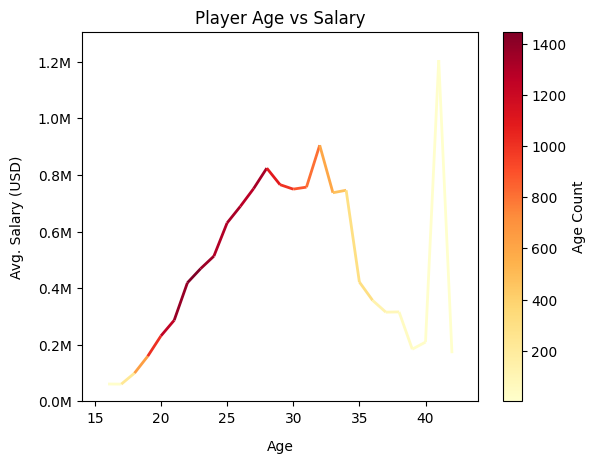

In [493]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

x = fifa_players_df.groupby('age')[salary_column].mean(salary_column).index.to_numpy() # Array of ages
y = fifa_players_df.groupby('age')[salary_column].mean(salary_column).to_numpy() # Array of average salaries
dydx = fifa_players_df.groupby('age').size().to_numpy()  # Array of count of age

# Create a set of line segments so that we can color them individually
# This creates the points as an N x 1 x 2 array so that we can stack points
# together easily to get the segments. The segments array for line collection
# needs to be (numlines) x (points per line) x 2 (for x and y)
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

fig, ax = plt.subplots()

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(dydx.min(), dydx.max())
lc = LineCollection(segments, cmap='YlOrRd', norm=norm)
# Set the values used for colormapping
lc.set_array(dydx)
lc.set_linewidth(2)
line = ax.add_collection(lc)
axcb = fig.colorbar(line, ax=ax)
axcb.set_label('Age Count')

ax.set_xlim(x.min() - 2, x.max() + 2)
ax.set_ylim(0, y.max() + 100000)

ax.set_xlabel("Age", labelpad=10)
ax.set_ylabel("Avg. Salary (USD)", labelpad=10)
ax.yaxis.set_major_formatter(formatter)

ax.set_title('Player Age vs Salary')

plt.show()